In [1]:
!conda install -y gdown

Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - gdown


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    beautifulsoup4-4.10.0      |     pyha770c72_0          77 KB  conda-forge
    filelock-3.5.0      

In [4]:
#!gdown --id 1-FT5Se06Gw0AM1RDpmN9DrlGxFqNOoM5
!wget https://nlp.stanford.edu/data/glove.42B.300d.zip
!unzip glove.42B.300d.zip

--2022-02-16 00:05:45--  https://nlp.stanford.edu/data/glove.42B.300d.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.42B.300d.zip [following]
--2022-02-16 00:05:45--  http://downloads.cs.stanford.edu/nlp/data/glove.42B.300d.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1877800501 (1.7G) [application/zip]
Saving to: ‘glove.42B.300d.zip’

glove.42B.300d.zip  100%[===================>]   1.75G  5.16MB/s    in 5m 55s  

2022-02-16 00:11:41 (5.04 MB/s) - ‘glove.42B.300d.zip’ saved [1877800501/1877800501]

Archive:  glove.42B.300d.zip
  inflating: glove.42B.300d.txt      


In [5]:
!gdown --id 1GyJFqydGVTdyGH1EhJ6ZXzG5lcQvVdZD

Downloading...
From: https://drive.google.com/uc?id=1GyJFqydGVTdyGH1EhJ6ZXzG5lcQvVdZD
To: /kaggle/working/TextClassification_CNN.csv
100%|███████████████████████████████████████| 56.4M/56.4M [00:00<00:00, 140MB/s]


In [6]:
import pandas as pd
df = pd.read_csv("TextClassification_CNN.csv")
df.head()

,text,target,emails,subjects,cleaned_texts
0,From: cdt@sw.stratus.com (C. D. Tavares)\nSubj...,talk.politics.misc,stratus encore encore rocket stratus vos stratus,Limiting Govt (was Re: Employment (was Re: Wh...,in article let explain some possible me...
1,From: as010b@uhura.cc.rochester.edu (Tree of S...,talk.politics.misc,uhura rochester edu optilink optilink hilbert ...,Why not concentrate on child molesters?,in in article article however m...
2,From: cramer@optilink.COM (Clayton Cramer)\nSu...,talk.politics.misc,optilink rigel econ uga edu rigel econ uga edu...,Lincoln & slavery (Re: Top Ten Tricks You Can...,in article article the argument that slave...
3,From: pyotr@halcyon.com (Peter D. Hampe)\nSubj...,talk.politics.misc,halcyon dscomsa desy halcyon,"Phill says Koresh == Hitler, was Welcome to P...",the murderes four police officers justic...
4,From: rja@mahogany126.cray.com (Russ Anderson)...,talk.politics.misc,mahogany126 cray desire wright edu desire wrig...,The state of justice,in article judge denied new trial motion e...


In [7]:
df_processed = df['emails'] + df['subjects'] + df['text']

In [8]:
y = df['target']

In [9]:
from sklearn.model_selection import train_test_split
X_train ,X_test ,y_train,y_test = train_test_split(df_processed,y,test_size = 0.25,stratify = y)

In [10]:
from sklearn.preprocessing import LabelEncoder
Lencoder = LabelEncoder()
Lencoder.fit(y_train.values)
encoded_Y = Lencoder.transform(y_train.values)
encoded_Y_te = Lencoder.transform(y_test.values)

print(encoded_Y)
min(encoded_Y),max(encoded_Y),encoded_Y.shape

print(encoded_Y_te)
min(encoded_Y_te),max(encoded_Y_te),encoded_Y_te.shape



[17 15 17 ...  7  2 19]
[ 2 17 17 ...  1 10  8]


(0, 19, (4707,))

In [11]:
from keras.utils import np_utils

#Y labels Encoding
y_train_cat = np_utils.to_categorical(encoded_Y)
y_test_cat = np_utils.to_categorical(encoded_Y_te)

y_train_cat[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0.], dtype=float32)

In [12]:
print(y_train_cat.shape)
print(y_test_cat.shape)

(14121, 20)
(4707, 20)


In [13]:
from keras.preprocessing import sequence, text

import tensorflow as tf

corpus = "it was the best of times, it was the worst_of times"
corpus = [c + '\n' for c in corpus.split()]
filters_ = '!"#$%&()*+,-./:;<=>?@[\\]`{|}~\t\n' # <= removed '\n'
my_tokenizer = text.Tokenizer(
    filters=filters_)
my_tokenizer.fit_on_texts(corpus)
my_tokenizer.word_docs

defaultdict(int,
            {'it': 2,
             'was': 2,
             'the': 2,
             'best': 1,
             'of': 1,
             'times': 2,
             'worst_of': 1})

In [14]:
X_train = X_train.astype(str)
X_test = X_test.astype(str)

len_array_texts = [ len(x) for x in X_train.values]

import numpy as np

np.percentile(len_array_texts,90)

3135.0

In [15]:
#https://stackoverflow.com/questions/58591223/forcing-tensorflows-tokenizer-to-include-next-line-char

filters_ = '!"#$%&()*+,-./:;<=>?@[\\]`{|}~\t\n'
tk = text.Tokenizer(filters = filters_)
tk.fit_on_texts(X_train.values)

max_len = 3000
X_train_seq = tk.texts_to_sequences(X_train.values)
X_train_padded = sequence.pad_sequences(X_train_seq, maxlen=max_len)

X_test_seq = tk.texts_to_sequences(X_test.values)
X_test_padded = sequence.pad_sequences(X_test_seq, maxlen=max_len)


In [16]:
from tqdm import tqdm

word_index = tk.word_index

embeddings_index = {}
f = open("glove.42B.300d.txt",'r', encoding="utf8")
for line in tqdm(f):
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32') #np.array([float(val) for val in values[1:]]) #np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index))

1917494it [03:16, 9744.15it/s] 

Found 1917494 word vectors.


In [17]:
embedding_matrix = np.zeros((len(word_index) + 1, 300))

for word, i in tqdm(word_index.items()):
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

100%|██████████| 159904/159904 [00:00<00:00, 299527.45it/s]


In [18]:
from keras.layers.core import Dense, Activation, Dropout,Flatten
from keras.regularizers import l2
from keras.layers.embeddings import Embedding
from keras.layers import Input,BatchNormalization
from keras.layers import Conv1D, MaxPool1D
from keras.callbacks import ModelCheckpoint
from keras.models import Model
from tensorflow.keras.callbacks import LearningRateScheduler
import os
import datetime
from keras.callbacks import EarlyStopping
import keras.backend as K

In [19]:
#Model 1

#https://keras.io/api/layers/convolution_layers/convolution1d/

inputs = Input(shape=(3000,))

embedding = Embedding(len(word_index) + 1,300,weights=[embedding_matrix],input_length=3000,trainable=False)(inputs)

Conv1D_L1_p = Conv1D(filters=20,kernel_size=3,strides=1,padding='valid',data_format='channels_last',
              activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=30),kernel_regularizer=l2(0.00001),
                                            name='Conv1D_L1_p')(embedding)

Conv1D_L2_p= Conv1D(filters=16,kernel_size=3,strides=1,padding='valid',data_format='channels_last',
              activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=33),kernel_regularizer=l2(0.00001),
                                            name='Conv1D_L2_p')(embedding)

Conv1D_L3_p = Conv1D(filters=12,kernel_size=3,strides=1,padding='valid',data_format='channels_last',
              activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=35),kernel_regularizer=l2(0.00001),
                                            name='Conv1D_L3_p')(embedding)    

#https://keras.io/api/layers/merging_layers/concatenate/

concat_Layer1 = tf.keras.layers.concatenate([Conv1D_L1_p, Conv1D_L2_p, Conv1D_L3_p])

drop =Dropout(0.2)(concat_Layer1)
batch_N=BatchNormalization()(drop)


Pool_Max = MaxPool1D(pool_size=1,strides=1,padding='valid',data_format='channels_last',name='Pool_Max')(batch_N)

ConvLayer_i = Conv1D(filters=16,kernel_size=3,strides=1,padding='valid',data_format='channels_last',
              activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=30),kernel_regularizer=l2(0.00001),
                                               name='ConvLayer_i')(Pool_Max)
             
ConvLayer_j= Conv1D(filters=12,kernel_size=3,strides=1,padding='valid',data_format='channels_last',
              activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=31),kernel_regularizer=l2(0.00001),
                                                        name='ConvLayer_j')(Pool_Max)


ConvLayer_k = Conv1D(filters=14,kernel_size=3,strides=1,padding='valid',data_format='channels_last',
              activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=32),kernel_regularizer=l2(0.00001),
                                                             name='ConvLayer_k')(Pool_Max)
  

concat_Layer2 = tf.keras.layers.concatenate([ConvLayer_i,ConvLayer_j,ConvLayer_k])

batch_N2 = BatchNormalization()(concat_Layer2) 

Pool_Max2 = MaxPool1D(pool_size=1,strides=1,padding='valid',data_format='channels_last',name='Pool_Max2')(batch_N2)

ConvLayer_p = Conv1D(filters=32,kernel_size=3,strides=1,padding='valid',data_format='channels_last',kernel_regularizer=l2(0.0001),
              activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=33),
                                                                      name='ConvLayer_p')(Pool_Max2)

drop1 =Dropout(0.3)(ConvLayer_p)

flatten = Flatten(data_format='channels_last',name='Flatten')(drop1)

                                                                                  
DnsL = Dense(100,activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=30),kernel_regularizer=l2(0.001))(flatten)
DnsL  =  Dropout(0.2)(DnsL)

DnsL  = BatchNormalization()(DnsL)
DnsL = Dense(50,activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=30),kernel_regularizer=l2(0.001))(DnsL)

DnsL  =  Dropout(0.3)(DnsL)
DnsL   = BatchNormalization()(DnsL)

DnsL = Dense(25,activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=30),kernel_regularizer=l2(0.001))(DnsL)
DnsL   = BatchNormalization()(DnsL)


Output = Dense(units=20,activation='softmax',kernel_initializer=tf.keras.initializers.glorot_normal(seed=3),name='Output')(DnsL)

model_1= Model(inputs=inputs,outputs=Output)

2022-02-16 00:16:32.573652: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-16 00:16:32.713596: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-16 00:16:32.714675: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-16 00:16:32.716713: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [20]:
#https://datascience.stackexchange.com/questions/45165/how-to-get-accuracy-f1-precision-and-recall-for-a-keras-model
#https://stackoverflow.com/questions/43547402/how-to-calculate-f1-macro-in-keras

def recall_custom(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_custom(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_custom(y_true, y_pred):
    precision = precision_custom(y_true, y_pred)
    recall = recall_custom(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def changeLearningRate(epoch,lr):
  if epoch<30:
    lr=0.0001
    return lr
  else :
    lr=0.00001
    return lr

In [21]:
lrschedule = LearningRateScheduler(changeLearningRate)

optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001)
model_1.compile(optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy',f1_custom])

earlystop = EarlyStopping(monitor='val_accuracy', min_delta=0.0005, patience=3, verbose=1)

filepath= "best_model_L1.h5" #"model_save/weights-{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_accuracy',  verbose=1, save_best_only=True, mode='auto')

In [22]:
# Commented out IPython magic to ensure Python compatibility.
# %load_ext tensorboard
!rm -rf ./model_save

In [23]:
log_dir = os.path.join("logs",'fits', datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1,write_graph=True)

model_1.fit(X_train_padded,y_train_cat,epochs=30, validation_data=(X_test_padded,y_test_cat), batch_size=30,
           callbacks=[checkpoint,tensorboard_callback,earlystop,lrschedule])

2022-02-16 00:16:47.643484: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-02-16 00:16:47.643557: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-02-16 00:16:47.646277: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1614] Profiler found 1 GPUs
2022-02-16 00:16:48.047404: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-02-16 00:16:48.047710: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed
2022-02-16 00:16:48.239860: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 169452000 exceeds 10% of free system memory.
2022-02-16 00:16:48.495212: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30


2022-02-16 00:16:51.828368: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 38323200 exceeds 10% of free system memory.
2022-02-16 00:16:51.837246: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 38323200 exceeds 10% of free system memory.
2022-02-16 00:16:52.972991: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


  1/471 [..............................] - ETA: 1:20:26 - loss: 4.0038 - accuracy: 0.1000 - f1_custom: 0.0000e+00

2022-02-16 00:16:58.918444: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-02-16 00:16:58.918505: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.


  2/471 [..............................] - ETA: 4:31 - loss: 4.1515 - accuracy: 0.0667 - f1_custom: 0.0000e+00   

2022-02-16 00:16:59.413991: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-02-16 00:16:59.415781: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed


  3/471 [..............................] - ETA: 4:01 - loss: 4.1305 - accuracy: 0.0444 - f1_custom: 0.0000e+00

2022-02-16 00:16:59.664238: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 677 callback api events and 673 activity events. 
2022-02-16 00:16:59.690872: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-02-16 00:16:59.730070: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/fits/20220216-001647/train/plugins/profile/2022_02_16_00_16_59

2022-02-16 00:16:59.745756: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to logs/fits/20220216-001647/train/plugins/profile/2022_02_16_00_16_59/4549299a2ee6.trace.json.gz
2022-02-16 00:16:59.812616: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/fits/20220216-001647/train/plugins/profile/2022_02_16_00_16_59

2022-02-16 00:16:59.819865: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for memory_profile.json.gz to

471/471 [==============================] - ETA: 0s - loss: 3.6319 - accuracy: 0.0620 - f1_custom: 0.0020

2022-02-16 00:17:13.785106: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 56484000 exceeds 10% of free system memory.


471/471 [==============================] - 29s 39ms/step - loss: 3.6319 - accuracy: 0.0620 - f1_custom: 0.0020 - val_loss: 3.3529 - val_accuracy: 0.0616 - val_f1_custom: 0.0044

Epoch 00001: val_accuracy improved from -inf to 0.06161, saving model to best_model_L1.h5
Epoch 2/30
471/471 [==============================] - 17s 36ms/step - loss: 3.4240 - accuracy: 0.0730 - f1_custom: 0.0016 - val_loss: 3.1850 - val_accuracy: 0.1175 - val_f1_custom: 0.0000e+00

Epoch 00002: val_accuracy improved from 0.06161 to 0.11748, saving model to best_model_L1.h5
Epoch 3/30
471/471 [==============================] - 16s 33ms/step - loss: 3.1860 - accuracy: 0.1035 - f1_custom: 9.5456e-04 - val_loss: 2.9300 - val_accuracy: 0.1515 - val_f1_custom: 0.0000e+00

Epoch 00003: val_accuracy improved from 0.11748 to 0.15148, saving model to best_model_L1.h5
Epoch 4/30
471/471 [==============================] - 17s 36ms/step - loss: 2.9261 - accuracy: 0.1528 - f1_custom: 0.0020 - val_loss: 2.6809 - val_accuracy:

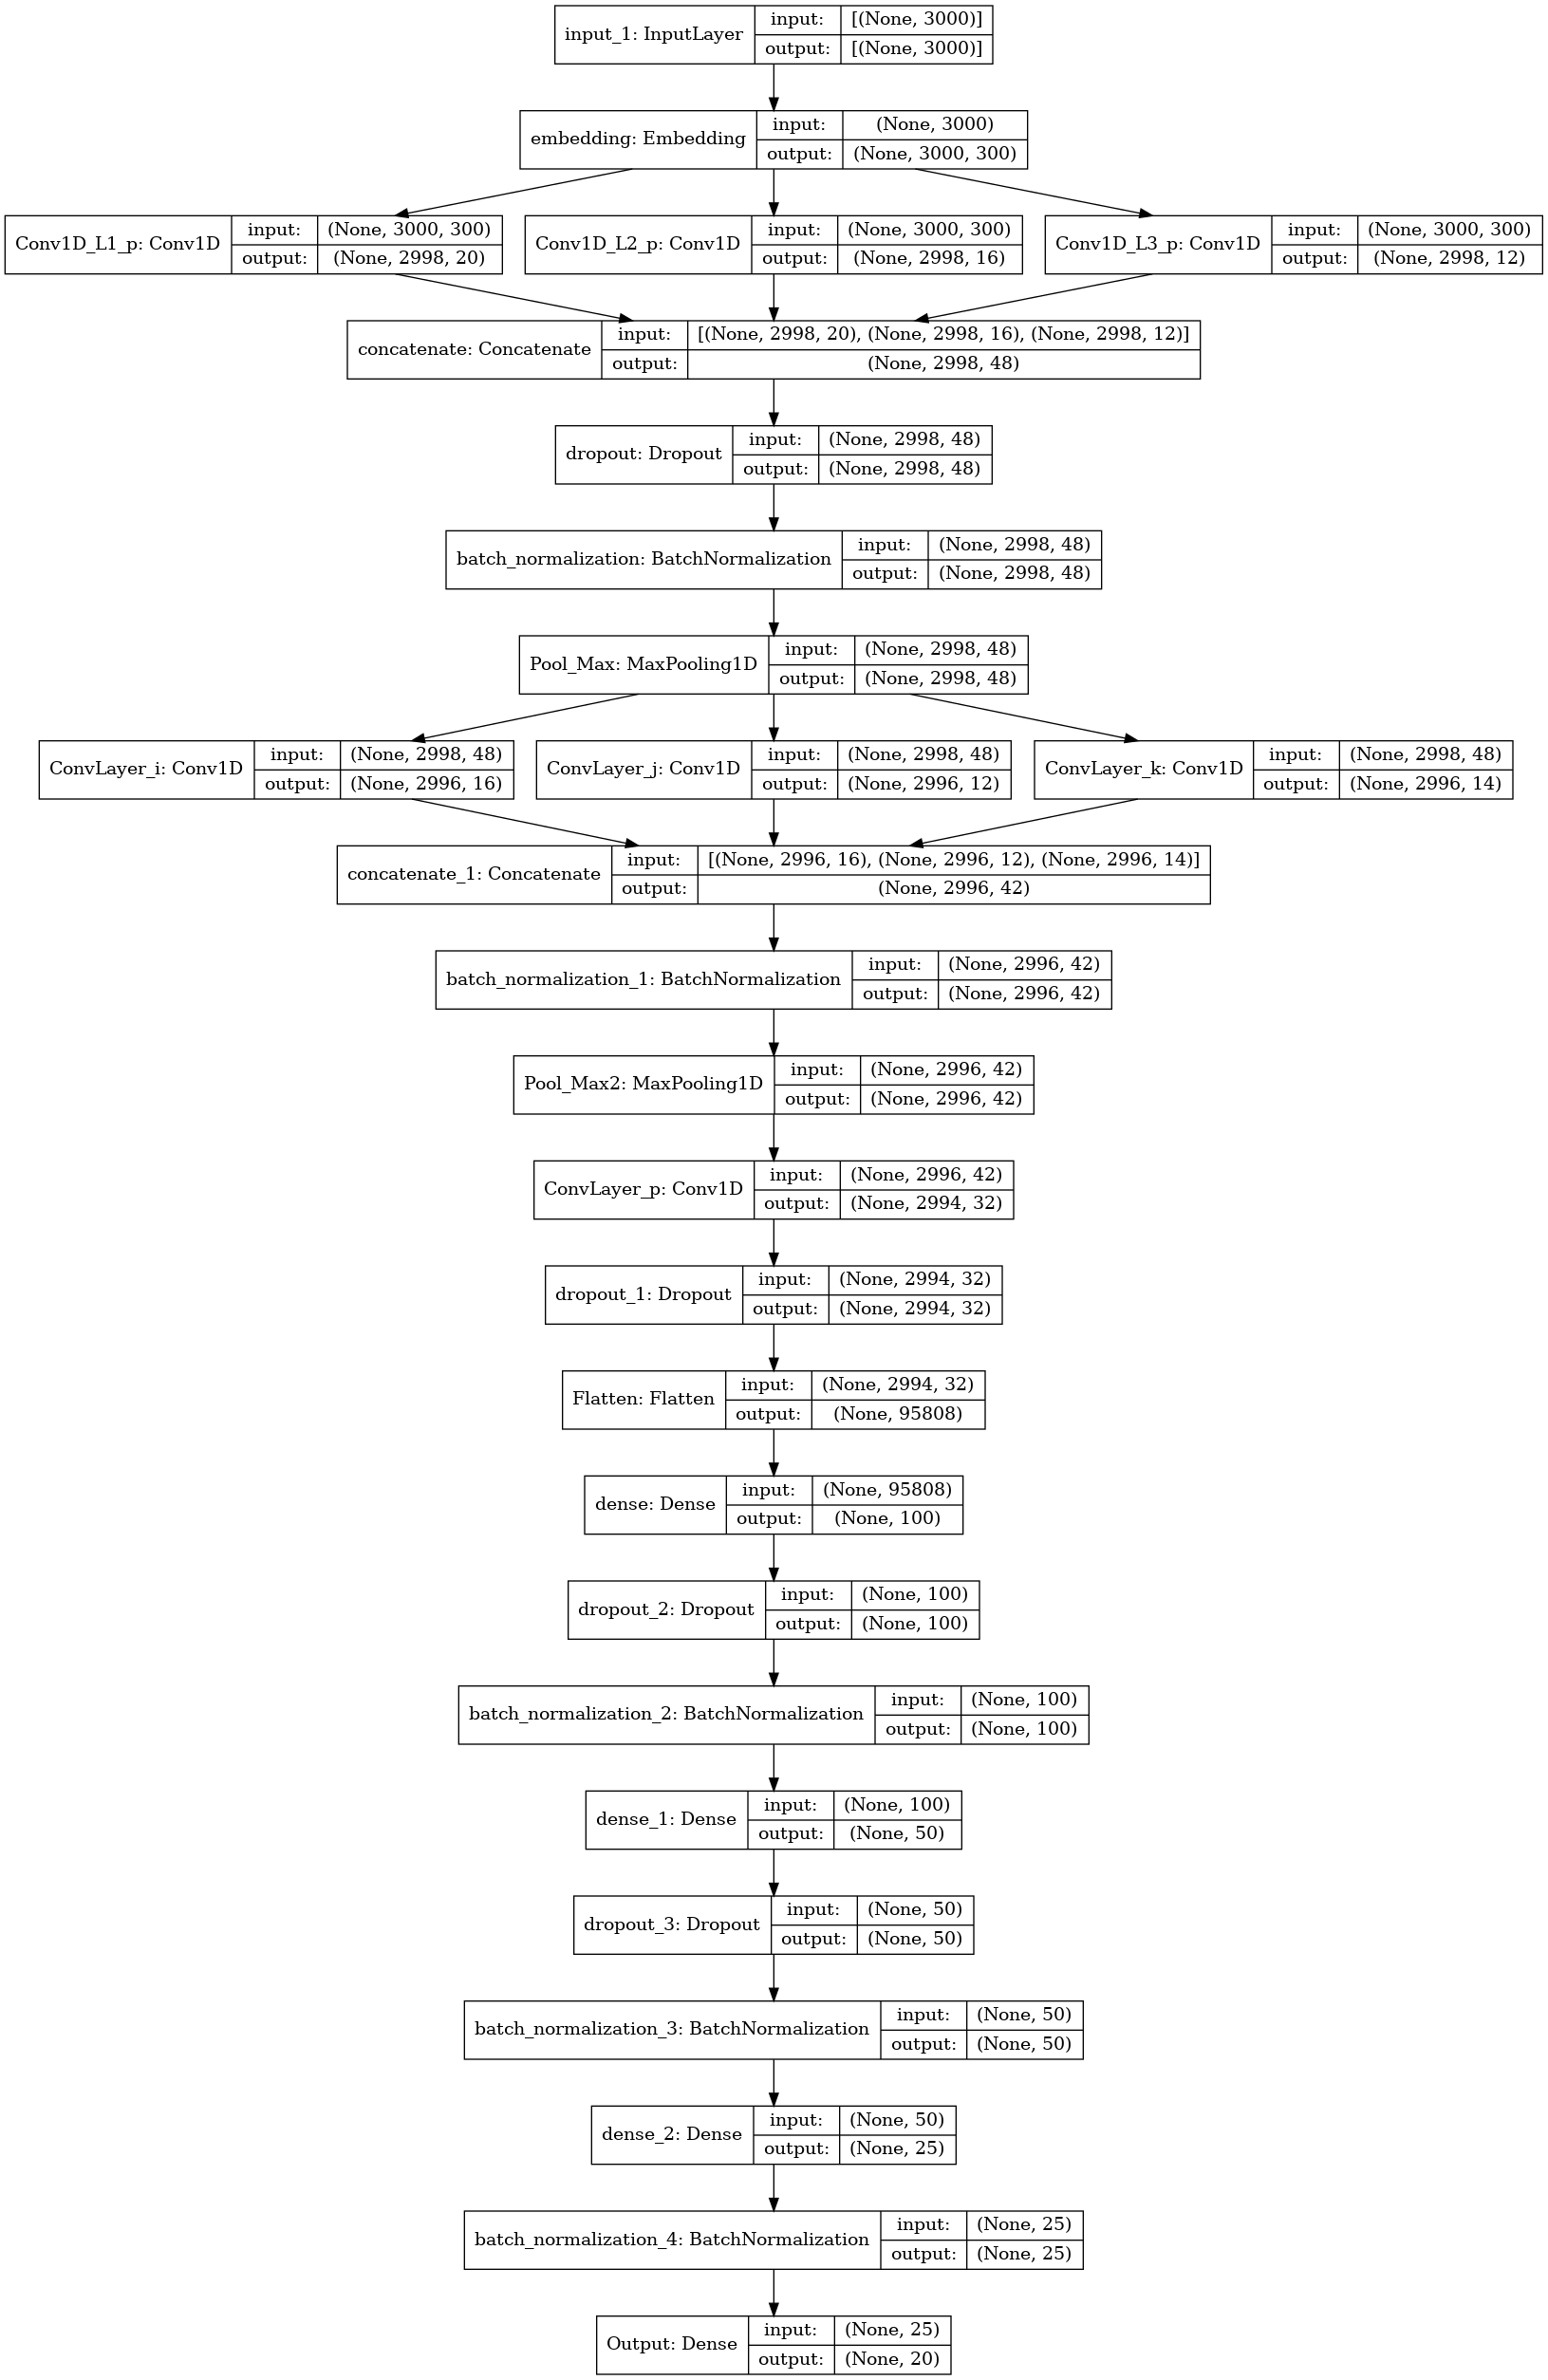

In [24]:
from tensorflow.keras.utils import plot_model
plot_model(model_1, 'model_1.png', show_shapes=True)

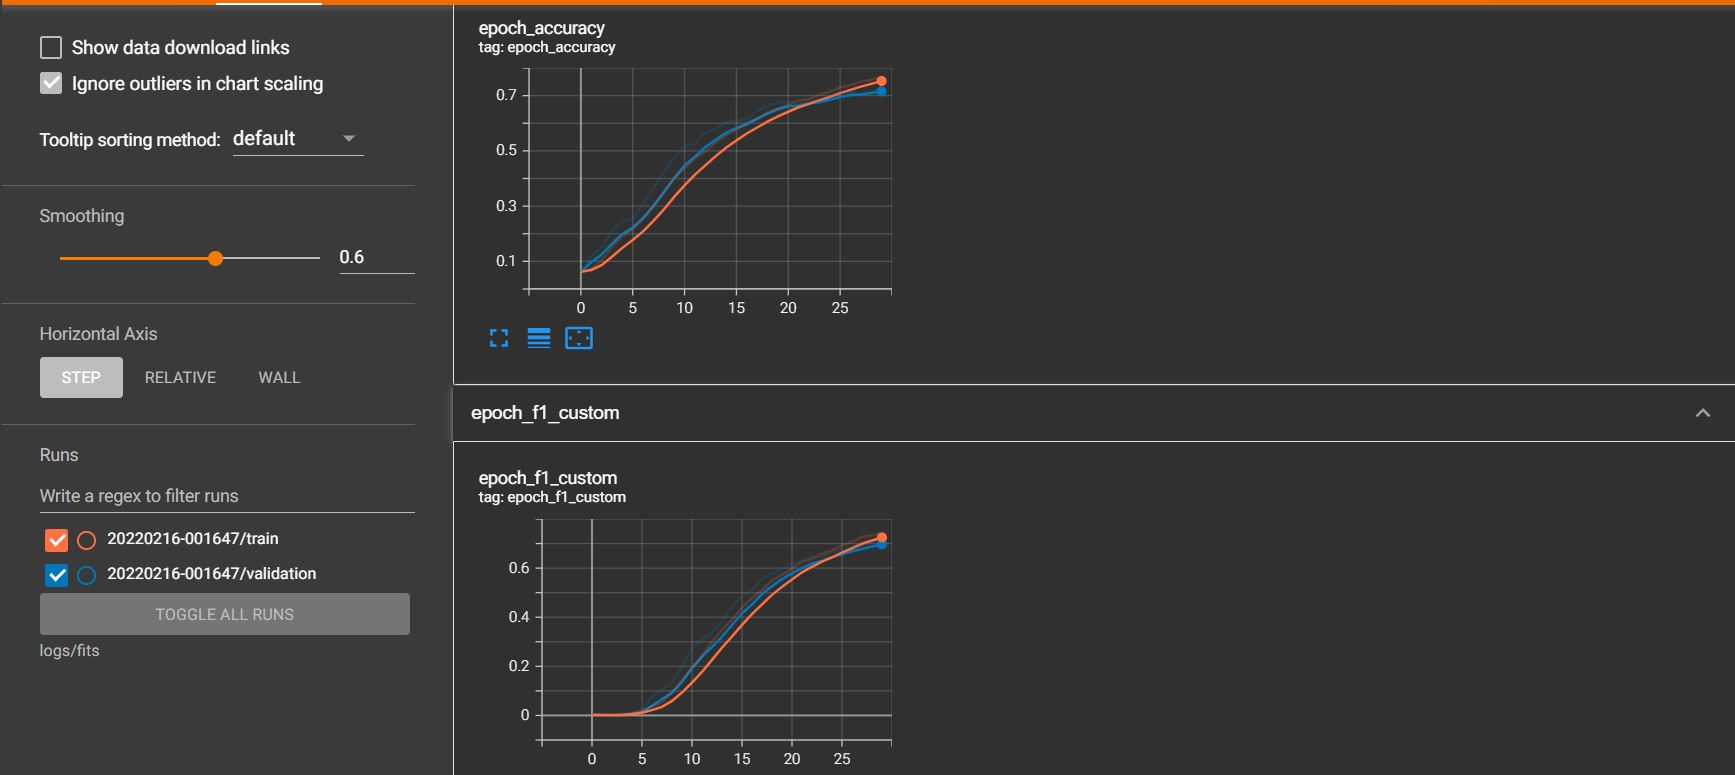

In [9]:
from IPython.display import Image 
Image('Model_1.jpg',width=700,height=700) 